# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
import nltk

get_ipython().run_line_magic("matplotlib", "inline")


%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jacqueline/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('news_api')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [37]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about bitcoin: 6715


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'AMC theaters will accept cryptocurrencies beyond Bitcoin',
 'description': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bitcoin Cash when crypto payments are available. He didn't hav…",
 'url': 'https://www.engadget.com/amc-theaters-accept-ethereum-litecoin-bitcoin-cash-132642183.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/4a01cb80-16eb-11ec-abfe-c7b840dd48ca',
 'publishedAt': '2021-09-16T13:26:42Z',
 'content': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"}

In [39]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about ethereum: 2612


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Kim Lyons',
 'title': 'China’s central bank bans cryptocurrency transactions to avoid ‘risks’',
 'description': 'China’s central bank on Friday said cryptocurrency transactions in the country are illegal, banning all transactions. It said cryptocurrencies like bitcoin and Ethereum are not legal tender and can’t be circulated.',
 'url': 'https://www.theverge.com/2021/9/24/22691472/china-central-bank-cryptocurrency-illegal-bitcoin',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
 'publishedAt': '2021-09-24T16:22:55Z',
 'content': 'Its the countrys latest crackdown on digital currencies\r\nIllustration by Alex Castro / The Verge\r\nThe Peoples Bank of China, the countrys central bank, said Friday that cryptocurrency transactions ar… [+1461 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()




,date,text,compound,positive,negative,neutral
0,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
1,2021-09-23,Four months after Twitter first introduced in-...,0.0000,0.000,0.000,1.000
2,2021-09-25,Bitcoin and similar blockchain-based cryptos e...,0.0000,0.000,0.000,1.000
3,2021-10-06,"<ul><li>Bitcoin, in terms of market value, ros...",0.3400,0.076,0.000,0.924
4,2021-10-06,How high are the chances of Bitcoin sustaining...,0.4939,0.219,0.000,0.781


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()


,date,text,compound,positive,negative,neutral
0,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000
1,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838
2,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.000,1.000
3,2021-09-16,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694
4,2021-09-22,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.000,0.892


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.143738,0.049630,0.016140,0.934240
std,0.300530,0.058887,0.037217,0.065724
min,-0.670500,0.000000,0.000000,0.702000
25%,0.000000,0.000000,0.000000,0.888000
50%,0.000000,0.034000,0.000000,0.936000
75%,0.366000,0.083000,0.000000,1.000000
max,0.855500,0.240000,0.215000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.0000,100.000000
mean,0.141500,0.059290,0.0256,0.915130
std,0.338307,0.066042,0.0447,0.080554
min,-0.757900,0.000000,0.0000,0.692000
25%,0.000000,0.000000,0.0000,0.855250
50%,0.000000,0.057500,0.0000,0.925000
75%,0.421500,0.102500,0.0410,1.000000
max,0.941300,0.308000,0.1830,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Ethereum, because the max was .941300 

Q. Which coin had the highest positive score?

A: Ethereum at .30800 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [77]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [78]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

# Expand the default stopwords list if necessary
stopwords = sw.union(sw_addons)


In [94]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase # Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in stopwords]
    
    return output

In [96]:
#tokenizer(bitcoin_df.text[99])

In [170]:
# Create a new tokens column for Bitcoin

bitcoin_df['words_tokenized'] = bitcoin_df['text'].apply(tokenizer)
bitcoin_df.head()

In [179]:
# Create a new tokens column for Ethereum
ethereum_df['words_tokenized'] = ethereum_df['text'].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,words_tokenized
0,2021-09-24,Its the countrys latest crackdown on digital c...,0.0000,0.000,0.000,1.000,"[country, latest, crackdown, digital, currenci..."
1,2021-09-16,You won't have to stick to Bitcoin if you're d...,0.5574,0.127,0.036,0.838,"[wont, stick, bitcoin, youre, determined, pay,..."
2,2021-10-14,Mark Cuban has some advice for people who are ...,0.0000,0.000,0.000,1.000,"[mark, cuban, ha, advice, people, new, investi..."
3,2021-09-16,OpenSea isn't wasting much time after its head...,0.2865,0.180,0.126,0.694,"[opensea, isnt, wasting, much, time, head, pro..."
4,2021-09-22,Robinhood plans to start a cryptocurrency wall...,0.4588,0.108,0.000,0.892,"[robinhood, plan, start, cryptocurrency, walle..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [180]:
from collections import Counter
from nltk import ngrams

In [187]:
print(dict(word_counts.most_common(10)))

{'text': 1, 'date': 1, 'compound': 1, 'positive': 1, 'negative': 1, 'neutral': 1, 'words_tokenized': 1}


In [188]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = Counter(ngrams(bitcoin_df, n=2))
print(dict(bigram_counts))



{('text', 'date'): 1, ('date', 'compound'): 1, ('compound', 'positive'): 1, ('positive', 'negative'): 1, ('negative', 'neutral'): 1, ('neutral', 'words_tokenized'): 1}


In [189]:
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(ethereum_df, n=2))
print(dict(bigram_counts))

{('date', 'text'): 1, ('text', 'compound'): 1, ('compound', 'positive'): 1, ('positive', 'negative'): 1, ('negative', 'neutral'): 1, ('neutral', 'words_tokenized'): 1}


In [190]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [197]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokenizer(bitcoin_df['text'].str.cat()), N=10)

[('bitcoin', 71),
 ('reuters', 29),
 ('cryptocurrency', 26),
 ('ha', 21),
 ('taken', 16),
 ('us', 15),
 ('illustration', 15),
 ('company', 13),
 ('charsa', 13),
 ('seen', 13)]

In [198]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokenizer(ethereum_df['text'].str.cat()), N=10)

[('bitcoin', 34),
 ('ha', 34),
 ('cryptocurrency', 24),
 ('ethereum', 20),
 ('cryptocurrencies', 17),
 ('taken', 15),
 ('illustration', 14),
 ('world', 13),
 ('crypto', 13),
 ('token', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [199]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [205]:
def wordcloud(text, title):
    wc = WordCloud().generate(text)
    plt.imshow(wc)
    plt.title(title)
    plt.show()

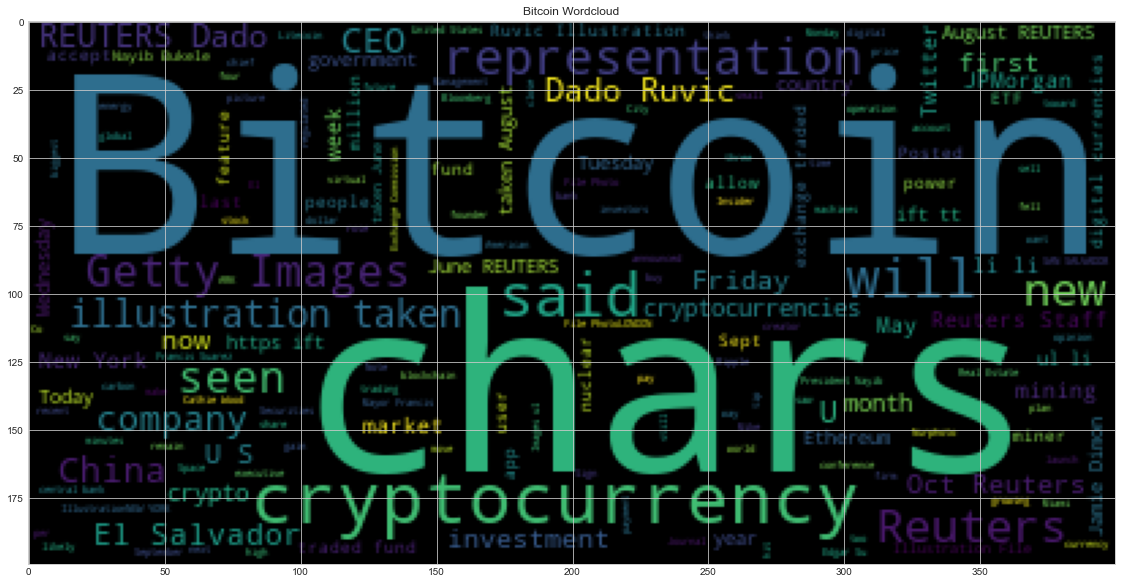

In [207]:
# Generate the Bitcoin word cloud
wordcloud(bitcoin_df['text'].str.cat(), "Bitcoin Wordcloud")

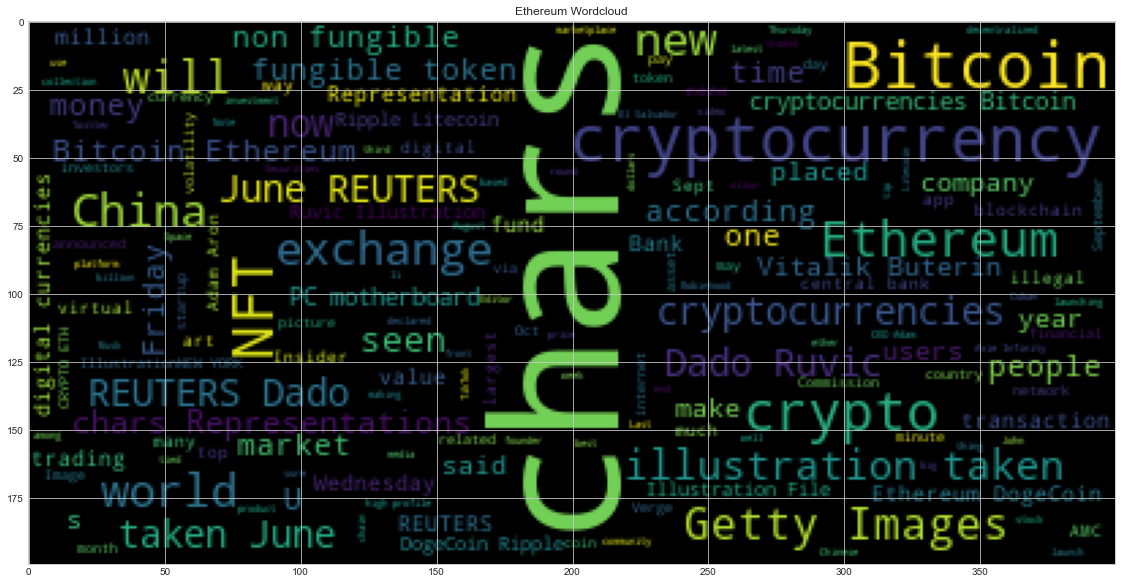

In [208]:
# Generate the Ethereum word cloud
wordcloud(ethereum_df['text'].str.cat(), "Ethereum Wordcloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [210]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
#!python -m spacy download en_core_web_sm




In [212]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [213]:
# Concatenate all of the Bitcoin text together
bitcoin_text = bitcoin_df['text'].str.cat()

In [216]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text)

# Add a title to the document
bitcoin_doc.user_data["title"] = "Bitcoin NER"

In [ ]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent', jupyter=True)


In [ ]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

---

### Ethereum NER

In [224]:
# Concatenate all of the Ethereum text together
ethereum_text = ethereum_df['text'].str.cat()

In [225]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_text)

# Add a title to the document
ethereum_doc.user_data["title"] = "Ethereum NER"

In [228]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent', jupyter=True)


In [ ]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

---